<a href="https://colab.research.google.com/github/vinnimichelin/Churn_Data_Streaming/blob/main/Churn_Data_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Contexto do Case**

Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o
alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível
prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça,
e com base nessa informação tomar ações para reduzir o churn.
Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem
mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa
forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

In [ ]:
import pandas as pd

# **Análise Exploratória**

In [ ]:
df = pd.read_csv('streaming_data.csv', sep=',')

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


**Coluna - Descrição**


* age - Idade do cliente
* gender - Gênero do cliente
* time_on_platform - O numero de dias que o cliente está na plataforma
* devices_connected - Quantidade de dispositivos conectados à conta
* subscription_type - Tipo de conta
* num_streaming_services - Quantidade de serviços de streaming que o cliente possui
* num_active_profiles - Número de perfis ativos na plataforma
* avg_rating - Avaliação média dos conteúdos da plataforma
* churned - Se o cliente cancelou a conta ou não
* user_id -  Código de identificação do cliente

In [ ]:
#Informações das colunas do DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
#Contagem dos valores nulos

df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [ ]:
#Descrição dos dados

df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
#Quantidade dos usuários Churn

churned_agg = df.groupby("Churned")['User_id'].count().reset_index()
churned_agg = pd.DataFrame(churned_agg)
churned_agg

,Churned,User_id
0,0.0,46285
1,1.0,14863


[Text(0.5, 0, 'Churned'), Text(0, 0.5, 'Quantidade de Usuários')]

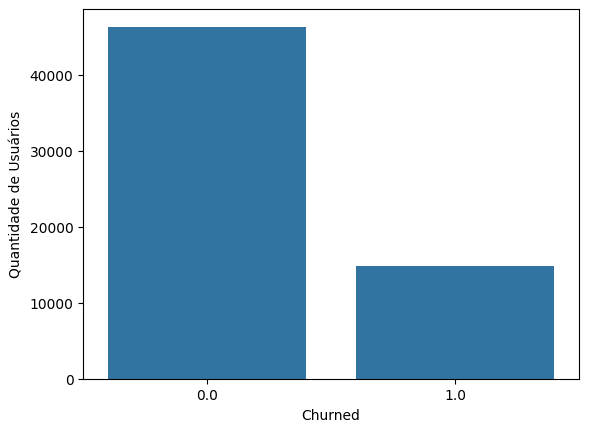

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g1 = sns.barplot(data=churned_agg, x = "Churned", y = "User_id")
g1.set(xlabel = 'Churned', ylabel = 'Quantidade de Usuários')

In [ ]:
#As 10 idades com maior índice Churn

churn_age_agg = df.groupby("Age")['Churned'].count().reset_index().sort_values('Churned', ascending=False)
churn_age_agg = pd.DataFrame(churn_age_agg)
churn_age_agg = churn_age_agg.sort_values('Churned', ascending=False)
churn_age_agg = churn_age_agg.iloc[0:10]
churn_age_agg

,Age,Churned
14,32.0,1072
2,20.0,1070
45,63.0,1059
33,51.0,1050
20,38.0,1048
38,56.0,1048
28,46.0,1047
51,69.0,1045
8,26.0,1044
31,49.0,1044


Text(0.5, 1.0, 'As 10 idades com maior índice Churn')

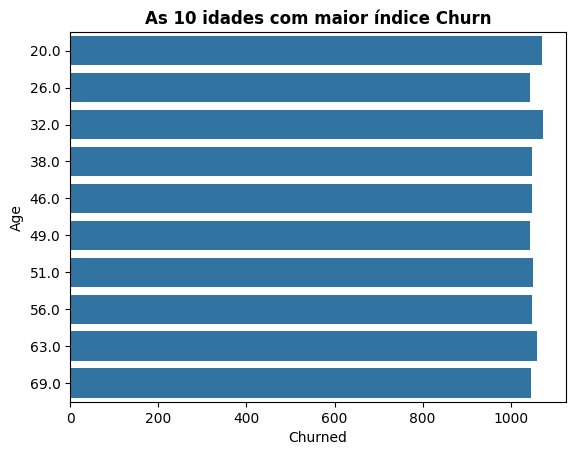

In [ ]:
g2 = sns.barplot(data=churn_age_agg, x = "Churned", y = "Age", orient='h')
g1.set(xlabel = 'Idade', ylabel = 'Quantidade de Usuários Churn')
plt.title('As 10 idades com maior índice Churn', loc='center', fontsize=12, fontweight='bold')

**Sem efetuar a limpeza dos dados, as plotagens não ficam tão claras quanto deveriam, então vou efetuar a limpeza dos dados antes e após isso farei uma melhor análise explorativa dos dados.**

# **Tratamento dos Dados**

In [ ]:
#Preenchendo os nulos com 0 nas colunas Time_on_platform, Num_streaming_services, Churned, Avg_rating e Devices_connected

df[['Time_on_platform','Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']] = df[['Time_on_platform','Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        77884 non-null  float64
 3   Devices_connected       77884 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              77884 non-null  float64
 8   Churned                 77884 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
#Dropando os valores nulos nas colunas Gender, Subscription_type e Age

df[['Gender','Subscription_type','Age']] = df[['Gender','Subscription_type','Age']].dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        77884 non-null  float64
 3   Devices_connected       77884 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              77884 non-null  float64
 8   Churned                 77884 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
#Dropando as linhas com dados nulos

df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


In [ ]:
#Alterando os valores Churned

df[['Churned']] = df[['Churned']].replace({0:'No', 1:'Yes'})

In [ ]:
#Alterando os valores float para int

df = df.astype({
    'Age':int,
    'Time_on_platform': int,
    'Devices_connected': int,
    'Num_streaming_services':int,
    'Avg_rating': int
})

**Agora com os dados limpos, plotarei os gráficos novamente para obtermos uma visualização melhor dos gráficos.**

In [ ]:
df.head(2)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31


In [ ]:
#Não Churn x Churn

churned_agg = df.groupby("Churned")['User_id'].count().reset_index()
churned_agg = pd.DataFrame(churned_agg)
churned_agg

,Churned,User_id
0,No,29459
1,Yes,7056


Text(0.5, 1.0, 'Não Churn x Churn')

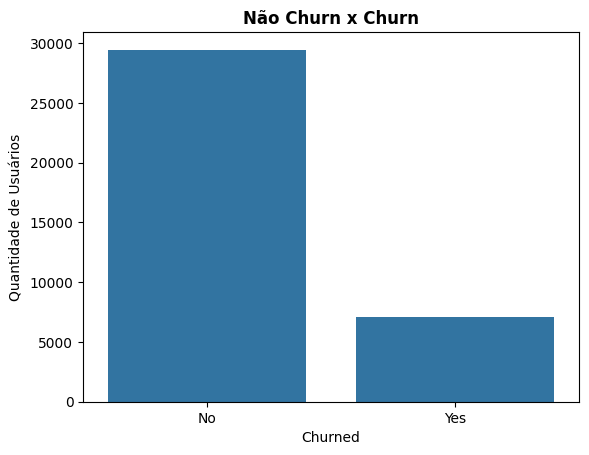

In [ ]:
g1 = sns.barplot(data=churned_agg, x = "Churned", y = "User_id")
g1.set(xlabel = 'Churned', ylabel = 'Quantidade de Usuários')
plt.title('Não Churn x Churn', loc='center', fontsize=12, fontweight='bold')

In [ ]:
churned = df[df.Churned == 'Yes']
churned = pd.DataFrame(churned)
churned.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
9,21,Female,112,2,Basic,0,3,2,Yes,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167
20,20,Male,2542,5,Basic,0,1,0,Yes,b4da071a-c8b4-44dd-84fb-7de32abf766f
22,49,Female,1015,1,Standard,2,1,3,Yes,6d7cda84-d34e-4756-9849-66824c41d195
49,69,Female,8655,2,Premium,3,5,3,Yes,216d81d7-f6eb-405f-bf16-a8303357db76


In [ ]:
#Quantidade de usuários Churn por idade

churn_age_agg = churned.groupby("Age")['Churned'].count().reset_index()
churn_age_agg = pd.DataFrame(churn_age_agg)
churn_age_agg = churn_age_agg.sort_values('Churned', ascending=False)
churn_age_agg = churn_age_agg.iloc[0:10]
churn_age_agg

,Age,Churned
47,65,171
14,32,160
2,20,155
3,21,154
9,27,154
29,47,153
20,38,151
19,37,151
41,59,150
27,45,149


Text(0.5, 1.0, 'Quantidade de usuários Churn por idade')

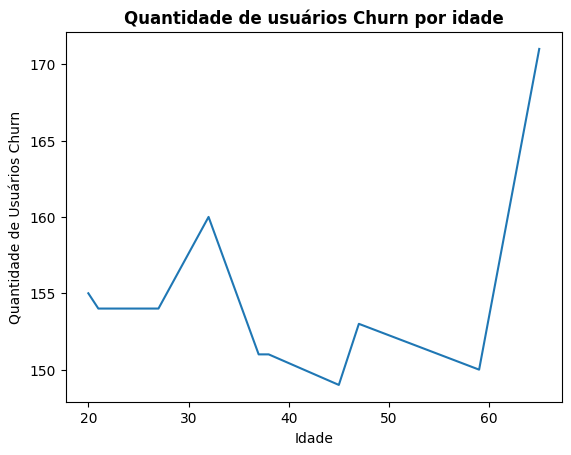

In [ ]:
g2 = sns.lineplot(data=churn_age_agg, y = "Churned", x = "Age")
g2.set(xlabel = 'Idade', ylabel = 'Quantidade de Usuários Churn')
plt.title('Quantidade de usuários Churn por idade', loc='center', fontsize=12, fontweight='bold')

In [ ]:
#Quantidade de usuários Churn por Gênero

churn_sex_agg = churned.groupby("Gender")['Churned'].count().reset_index().sort_values('Churned', ascending=False)
churn_sex_agg = pd.DataFrame(churn_sex_agg)
churn_sex_agg

,Gender,Churned
1,Male,3568
0,Female,3488


Text(0.5, 1.0, 'Quantidade de usuários Churn por Gênero')

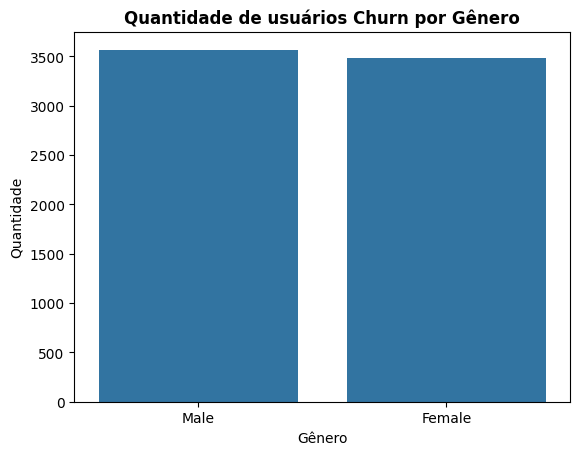

In [ ]:
g3 = sns.barplot(data=churn_sex_agg, x = "Gender", y = "Churned")
g3.set(xlabel = 'Gênero', ylabel = 'Quantidade')
plt.title('Quantidade de usuários Churn por Gênero', loc='center', fontsize=12, fontweight='bold')

In [ ]:
#Quantidade de usuários Churn por avaliação

churned_avg_agg = churned.groupby("Avg_rating")['User_id'].count().reset_index()
churned_avg_agg = pd.DataFrame(churned_avg_agg)
churned_avg_agg

,Avg_rating,User_id
0,0,1500
1,1,1384
2,2,1356
3,3,1379
4,4,1430
5,5,7


Text(0.5, 1.0, 'Quantidade de usuários Churn por avaliação')

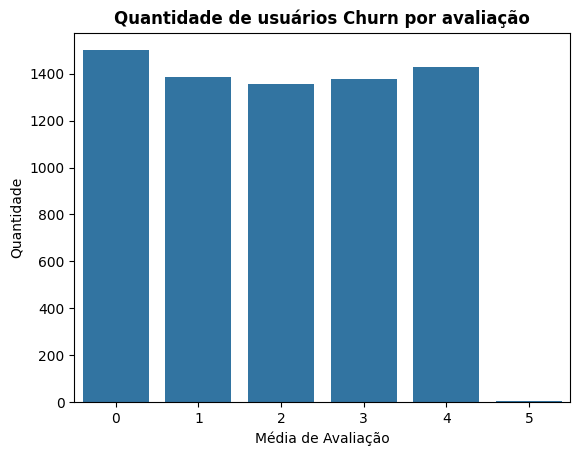

In [ ]:
g4 = sns.barplot(data=churned_avg_agg, x = "Avg_rating", y = "User_id")
g4.set(xlabel = 'Média de Avaliação', ylabel = 'Quantidade')
plt.title('Quantidade de usuários Churn por avaliação', loc='center', fontsize=12, fontweight='bold')

In [ ]:
#Quantidade de usuários Churn por Plano

churned_sub_agg = churned.groupby("Subscription_type")['User_id'].count().reset_index()
churned_sub_agg = pd.DataFrame(churned_sub_agg)
churned_sub_agg

,Subscription_type,User_id
0,Basic,2388
1,Premium,2358
2,Standard,2310


Text(0.5, 1.0, 'Quantidade de usuários Churn por Plano')

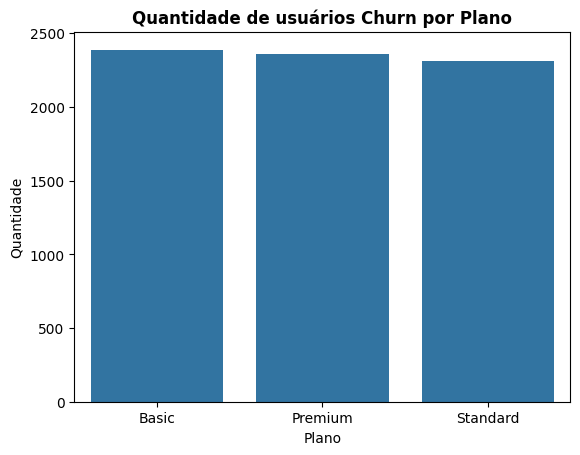

In [ ]:
g5 = sns.barplot(data=churned_sub_agg, x = "Subscription_type", y = "User_id")
g5.set(xlabel = 'Plano', ylabel = 'Quantidade')
plt.title('Quantidade de usuários Churn por Plano', loc='center', fontsize=12, fontweight='bold')

**Com estas análises plotadas, conseguimos visualizar claramente que em nossa base a maior parte dos clientes não são Churn.**


**Nossos clientes Churn possuem uma grande diversificação de caracteristicas gerais, ou seja: não possuimos um padrão de cliente Churn.**

# **Regressão Logística**

In [ ]:
#Separando X e Y

X = df[['Age','Time_on_platform','Gender','Devices_connected','Subscription_type','Num_streaming_services','Num_active_profiles','Avg_rating']]
y = df[["Churned"]]
y = pd.DataFrame(y)

In [ ]:
#Aplicando LabelEncoder no Y

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

In [ ]:
y.head()

,Churned
0,0
1,0
2,1
3,0
5,0


In [ ]:
#Aplicando Get Dummies no X

X = pd.get_dummies(X)

In [ ]:
#Aplicando MinMaxScaler no X

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X), index=X.index, columns=X.columns)

In [ ]:
#Separando a base de treino e a base de teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

In [ ]:
#Treinando o modelo de Regressão Logistica

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Fazendo a predição com a Regressão Logistica

lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Inserindo as predições na base de teste

X_test.assign(churn=y_test).assign(predict = lr.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,predict
14193,0.235294,0.000000,0.8,0.0,0.50,0.6,0.0,1.0,0.0,0.0,1.0,1,0
7178,0.392157,0.931727,0.2,0.0,0.00,0.8,0.0,1.0,0.0,0.0,1.0,0,0
47930,0.294118,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,0,0
64684,0.647059,0.000000,1.0,0.0,0.25,0.8,0.0,1.0,0.0,1.0,0.0,0,0
32078,0.921569,0.440804,1.0,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74498,1.000000,0.000000,0.6,0.0,0.00,0.2,1.0,0.0,0.0,0.0,1.0,0,0
5738,0.627451,0.848042,1.0,0.0,0.00,0.6,1.0,0.0,1.0,0.0,0.0,0,0
49079,1.000000,0.000000,0.8,0.0,0.00,0.6,0.0,1.0,0.0,1.0,0.0,0,0
55216,0.274510,0.595388,0.8,0.0,0.00,0.2,1.0,0.0,0.0,1.0,0.0,0,0


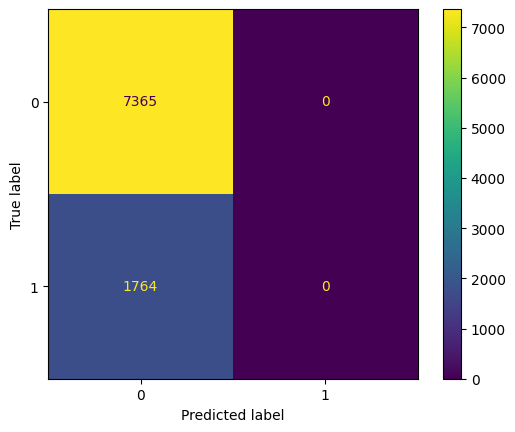

In [ ]:
#Plotando a matriz confusão

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_disp.plot()

In [ ]:
#Printando as métricas de acurácia

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")

Acurácia (Treino): 0.8067625794201416
Acurácia (Teste): 0.8067696352283931


In [ ]:
#Printando acurácia média e o intervalo de acurácia

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(lr, X_train,
                          y_train, cv = cv, scoring = 'accuracy')

def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Acurácia média: 80.68%
Intervalo de acurácia: [80.66% ~ 80.69%]


# **Random Forest**

In [ ]:
#Treinando o modelo de Random Forest

from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf.fit(X_train, y_train)

<ipython-input-74-69fe84a67a07>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
#Fazendo a predição com a Random Forest

rf.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#Inserindo as predições na base de teste

X_test.assign(churn = y_test).assign(predict = rf.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,predict
14193,0.235294,0.000000,0.8,0.0,0.50,0.6,0.0,1.0,0.0,0.0,1.0,1,1
7178,0.392157,0.931727,0.2,0.0,0.00,0.8,0.0,1.0,0.0,0.0,1.0,0,0
47930,0.294118,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,0,0
64684,0.647059,0.000000,1.0,0.0,0.25,0.8,0.0,1.0,0.0,1.0,0.0,0,0
32078,0.921569,0.440804,1.0,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74498,1.000000,0.000000,0.6,0.0,0.00,0.2,1.0,0.0,0.0,0.0,1.0,0,0
5738,0.627451,0.848042,1.0,0.0,0.00,0.6,1.0,0.0,1.0,0.0,0.0,0,0
49079,1.000000,0.000000,0.8,0.0,0.00,0.6,0.0,1.0,0.0,1.0,0.0,0,0
55216,0.274510,0.595388,0.8,0.0,0.00,0.2,1.0,0.0,0.0,1.0,0.0,0,1


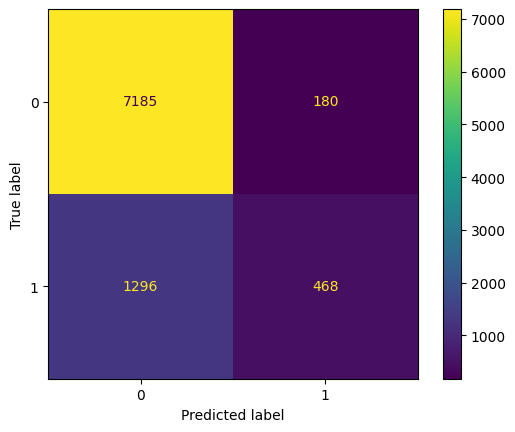

In [ ]:
#Plotando a matriz confusão

rf_predict = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_predict, labels=rf.classes_)

cm_rf_disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)

cm_rf_disp.plot()

In [ ]:
#Printando as métricas de acurácia

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")

Acurácia (Treino): 0.9947418388957862
Acurácia (Teste): 0.8383174498849819


In [ ]:
#Printando acurácia média e o intervalo de acurácia

cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(rf, X_train,
                          y_train, cv = cv, scoring = 'accuracy')

def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Acurácia média: 82.47%
Intervalo de acurácia: [82.23% ~ 82.71%]


**Tendo em vista que nossos clientes Churn não possuem um padrão muito claro, o Random Forest se saiu muito melhor nos testes, então utilizaremos o mesmo. Mas como ainda há um overfitting muito grande, iremos fazer um tunning no modelo.**

# **Tunning**

In [ ]:
#Dando as métricas para o tunning

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

cv = StratifiedKFold(n_splits = 5, shuffle = True)

grid_search = GridSearchCV(rf, parameters,scoring='accuracy',cv=cv,n_jobs=-1,)

In [ ]:
#Treinando o tunning

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
results_cv = pd.DataFrame(grid_search.cv_results_)
results_cv.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,2.624445,0.306412,0.127489,0.033425,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.806864,0.806829,0.806829,0.806829,0.806646,0.806799,0.000078,1
0,1.212129,0.475354,0.075604,0.032189,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.806681,0.806829,0.806829,0.806829,0.806646,0.806763,0.000082,2
26,13.976490,0.348047,0.464467,0.008300,9,500,"{'max_depth': 9, 'n_estimators': 500}",0.806681,0.806829,0.806829,0.806829,0.806646,0.806763,0.000082,2
25,8.499190,1.199071,0.332019,0.110539,9,300,"{'max_depth': 9, 'n_estimators': 300}",0.806681,0.806829,0.806829,0.806829,0.806646,0.806763,0.000082,2
24,2.315313,0.033618,0.105390,0.003885,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.806681,0.806829,0.806829,0.806829,0.806646,0.806763,0.000082,2


In [ ]:
#Encontrando os melhores parâmetros

grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Criando o modelo de Random Forest tunado

rf_tunned = RandomForestClassifier(
    bootstrap= True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion= 'gini',
    max_depth=10,
    max_features='sqrt',
    max_leaf_nodes= None,
    max_samples= None,
    min_impurity_decrease= 0.0,
    min_samples_leaf= 1,
    min_samples_split= 2,
    min_weight_fraction_leaf= 0.0,
    n_estimators= 100)

rf_tunned

RandomForestClassifier(max_depth=10)

In [ ]:
#Treinando o modelo de Random Forest tunado

rf_tunned.fit(X_train, y_train)

<ipython-input-106-60b539de9337>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
#Fazendo as predições com o modelo de Random Forest tunado

rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Inserindo as predições na base de teste

X_test.assign(churn = y_test).assign(predict = rf_tunned.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,predict
14193,0.235294,0.000000,0.8,0.0,0.50,0.6,0.0,1.0,0.0,0.0,1.0,1,0
7178,0.392157,0.931727,0.2,0.0,0.00,0.8,0.0,1.0,0.0,0.0,1.0,0,0
47930,0.294118,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,0,0
64684,0.647059,0.000000,1.0,0.0,0.25,0.8,0.0,1.0,0.0,1.0,0.0,0,0
32078,0.921569,0.440804,1.0,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74498,1.000000,0.000000,0.6,0.0,0.00,0.2,1.0,0.0,0.0,0.0,1.0,0,0
5738,0.627451,0.848042,1.0,0.0,0.00,0.6,1.0,0.0,1.0,0.0,0.0,0,0
49079,1.000000,0.000000,0.8,0.0,0.00,0.6,0.0,1.0,0.0,1.0,0.0,0,0
55216,0.274510,0.595388,0.8,0.0,0.00,0.2,1.0,0.0,0.0,1.0,0.0,0,0


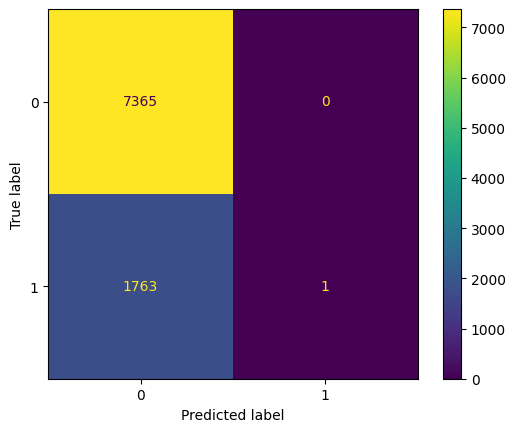

In [ ]:
#Plotando a matriz confusão

rf_t_pred = rf_tunned.predict(X_test)

cm_rf_t = confusion_matrix(y_test, rf_t_pred, labels=rf.classes_)

cm_rf_disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_t)

cm_rf_disp.plot()

In [ ]:
#Printando as métricas

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")


Acurácia (Treino): 0.80778499963485
Acurácia (Teste): 0.8068791762515062


In [ ]:
#Printando acurácia média e o intervalo de acurácia

cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(rf_tunned, X_train,
                          y_train, cv = cv, scoring = 'accuracy')

def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Acurácia média: 80.68%
Intervalo de acurácia: [80.67% ~ 80.69%]


# **Conclusão**

**Após efetuar o tunning do modelo, o mesmo diminuiu o overfitting e a acurácia continua alta. Porém, num geral o modelo piorou seu poder de predição.**

**Então podemos perceber que o modelo de Random Forest sem o tunning foi o modelo que performou uma melhor predição se comparado ao modelo de regressão logística, ou até mesmo o próprio Random Forest com o tunning.**